In [4]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from Fundamentals import fundamentals
from Fundamentals import OUTPUT_FOLDER

In [10]:
Company_Names = ["AMZN", "MSFT","AAPL", "TSLA","NFLX","FB","V","NVDA","GOOG","ZM","BA","INTC",'AMD',"F","GE","AAL",\
                 "DIS", "DAL", "CCL", "SNAP","UAL","BABA","UBER","TWTR","SBUX","SPY","QQQ","BYND","SQ","PENN",\
                 "XOM", "SHOP","ATVI","WMT","MRNA","JPM","GS","C","SNE","MGM"]

AMZN  Downloaded
MSFT  Downloaded
AAPL  Downloaded
TSLA  Downloaded
NFLX  Downloaded
FB  Downloaded
V  Downloaded
NVDA  Downloaded
GOOG  Downloaded
ZM  Downloaded
BA  Downloaded
INTC  Downloaded
AMD  Downloaded
GE  Downloaded
AAL  Downloaded
DIS  Downloaded
DAL  Downloaded
SNAP  Downloaded
BABA  Downloaded
UBER  Downloaded
TWTR  Downloaded
SBUX  Downloaded
BYND  Downloaded
SQ  Downloaded
PENN  Downloaded
SHOP  Downloaded
ATVI  Downloaded
WMT  Downloaded
MRNA  Downloaded
GS  Downloaded
SNE  Downloaded
MGM  Downloaded
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 compl

,Tickers,MarketCap,Beta,50 Day MA,MA to TP %,1W %Change,30day Vol,Avg Daily %Return,95% VaR,Sharpe Ratio,1W Ticker vs Bm %Change
0,AMZN,1561.249055,1.323857,3178.867808,2.010379,-11.758059,2.508458,0.3114,-4.44,33.271266,-8.486390
1,MSFT,1547.357389,0.893534,211.326200,3.576043,-11.923158,2.288030,0.1916,-5.61,12.360977,-8.651489
2,AAPL,1918.558405,1.284838,108.755500,-2.896875,-14.764075,2.889912,0.2983,-5.68,22.897724,-11.492406
3,TSLA,347.280572,1.638238,339.004757,-9.045730,-16.686411,6.505042,0.9801,-10.61,74.047112,-13.414741
4,NFLX,223.573213,0.969899,501.630001,4.066137,-12.808412,3.109512,0.2804,-5.52,21.779103,-9.536743
5,FB,761.204703,1.255852,258.419601,-3.072047,-11.864468,2.520655,0.1938,-5.60,12.580447,-8.592799
6,V,440.383341,0.898550,199.615600,-0.510566,-7.317072,1.395493,0.0931,-5.57,4.039892,-4.045403
7,NVDA,331.213570,1.525641,455.871999,-6.310985,-15.209285,3.004872,0.4948,-7.10,36.351375,-11.937616
8,GOOG,1033.635299,1.075250,1541.787390,1.385358,-12.009631,1.864537,0.0938,-4.85,5.562990,-8.737962
9,ZM,108.884886,NaN,285.734199,-25.395771,-9.575975,5.828215,0.9628,-9.80,83.038430,-6.304305


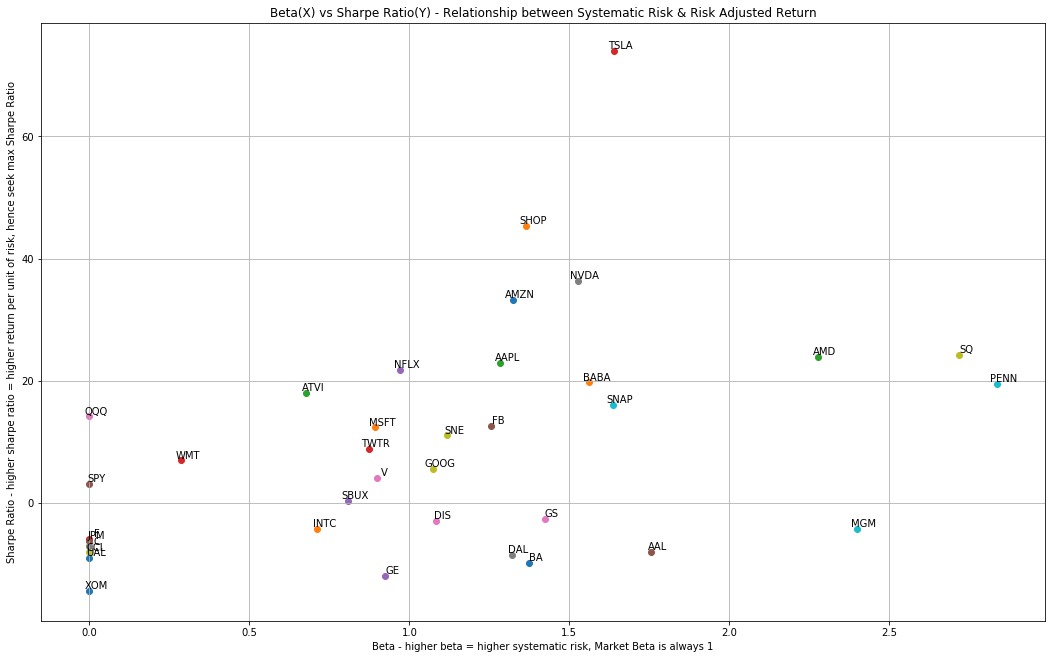

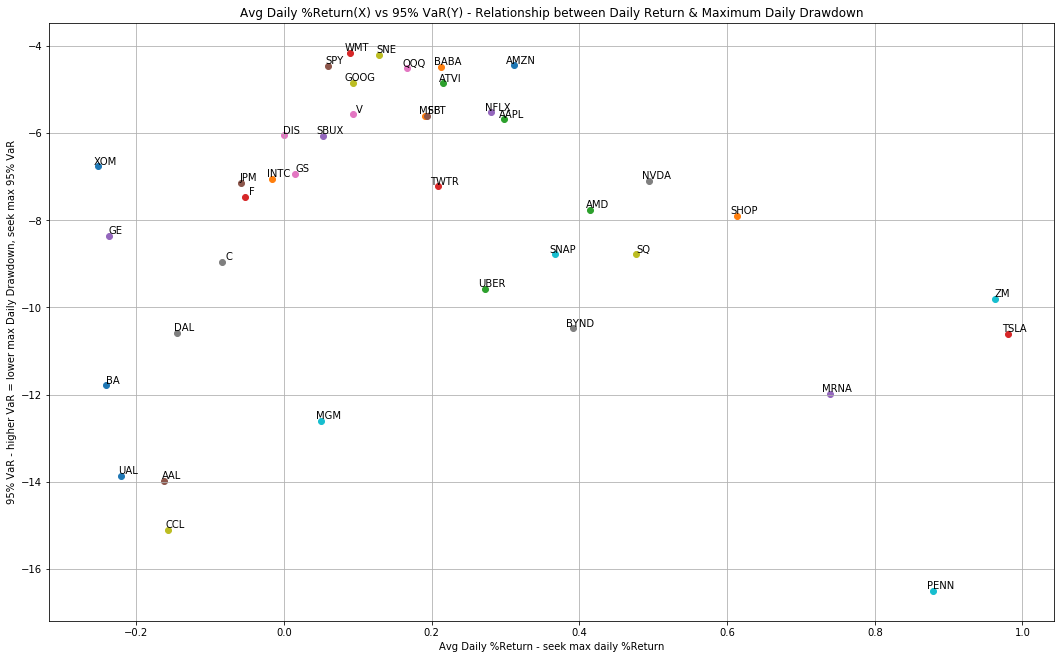

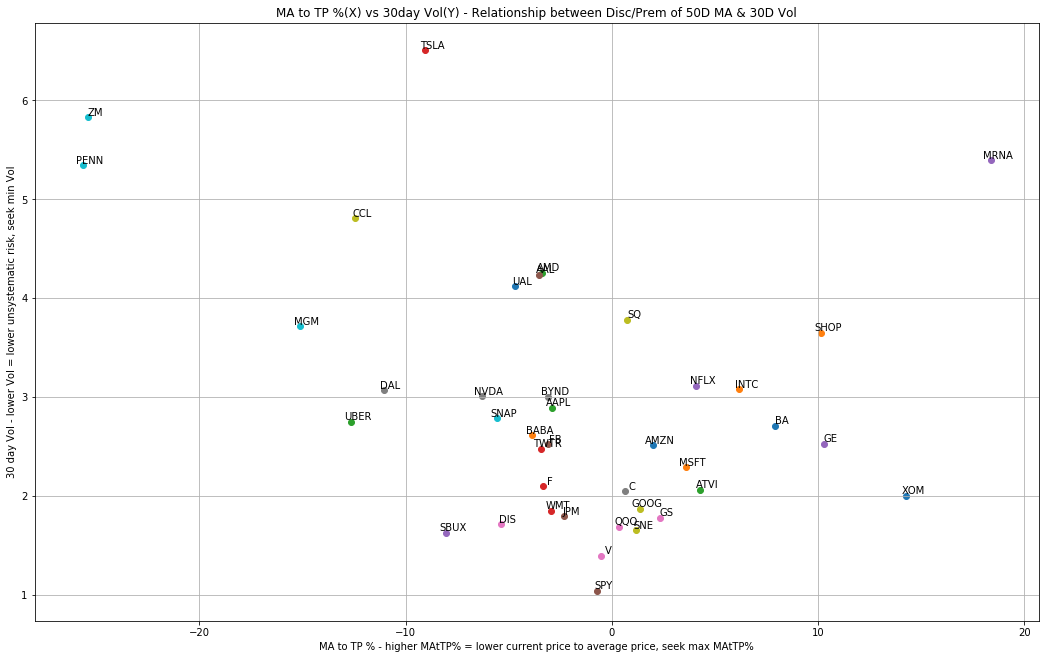

In [12]:
test = fundamentals(Company_Names=Company_Names,output_folder=OUTPUT_FOLDER, export_table=True)
test

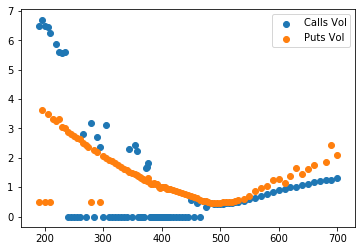

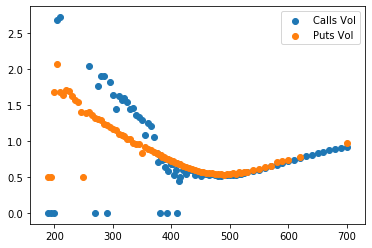

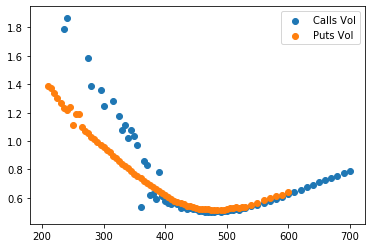

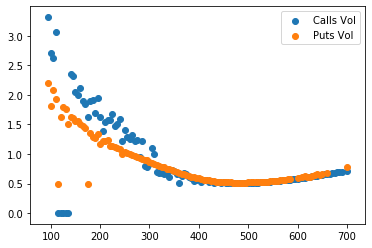

In [4]:
Company_Names=["AAPL"]

for x in Company_Names:
    ticker = yf.Ticker(x)
    for y in option_dates:
        tickeroptioninfo = ticker.option_chain(y)
        plt.figure()
        plt.scatter(tickeroptioninfo.calls["strike"], tickeroptioninfo.calls['impliedVolatility'], label='Calls Vol')
        plt.scatter(tickeroptioninfo.puts["strike"], tickeroptioninfo.puts['impliedVolatility'], label="Puts Vol")
        plt.legend()